# Ford GoBike System Data
## by Faisal AlFaqih

## Investigation Overview


> Formerly known as Ford GoBikes, renamed Lyft Bikes is a regional public bicycle sharing system in the San Francisco Bay Area, California.My overall goals are: find which days the costomer and the subscribers use the bike the most and comber between them and find the mean duration dor both of them .



## Dataset Overview

> This data set had information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data. 

 The Features included in the Data are as follows : 

- Member Year of Birth
-Member Gender
-User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
-Trip Duration(in seconds)
-Bike ID
-Start Time and Date
-End Time and Date
-Start Station ID
-End Station ID
-Start Station Name
-End Station Name
-End Station Latitude
-End Station Longitude
-Start Station Latitude
-Start Station Longitude

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Who are the most Ford GoBike users? Ary they Customers or Subscribers?

> Here we find that 89.2% of the user types in the Ford GoBikes sharing platform were Subscribers. 10.8% of the user types in the Ford GoBikes Sharing Platform were Customers.

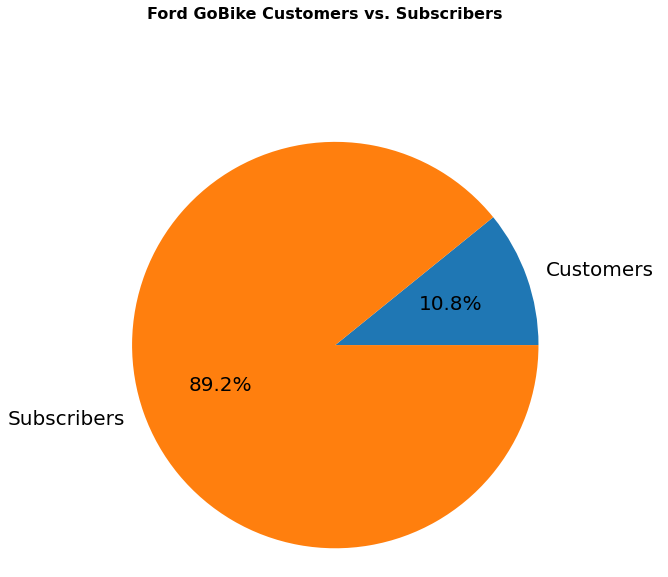

In [4]:
customers = df.query('user_type == "Customer"')['bike_id'].count()
subscribers = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customers / df['bike_id'].count()
subscriber_prop = subscribers / df['bike_id'].count()

plt.figure(figsize = [ 11.69, 8.27])
labels = ['Customers', 'Subscribers']
size = [customer_prop, subscriber_prop]
plt.pie(size, labels = labels, autopct='%1.1f%%', textprops={'color':'black','size':20})
plt.axis('equal')
plt.suptitle('Ford GoBike Customers vs. Subscribers', y=1.07,
             fontsize=16, fontweight='bold');

## Which days of the week do they ride the bikes the longest duration?

> in sunday and saturday the most days they uses the bike for more than 800 sec , the otherdays at usually used less than 800 sec.

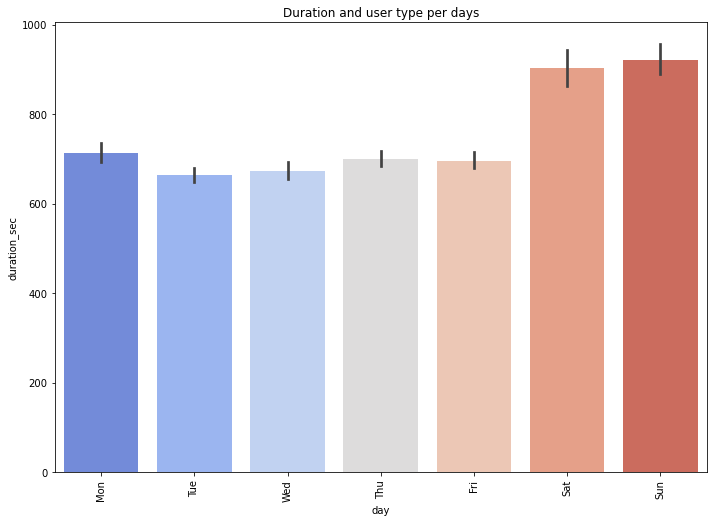

In [6]:
df.user_type = df.user_type.astype('category')

df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# add some needed columns to make an accurate relations
df['month'] = df.start_time.dt.strftime('%b')
df['day'] = df.start_time.dt.strftime('%a')
df['hour'] = df.start_time.dt.strftime('%H')

# lebale the days to be in order
week_days = [ 'Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize = [ 11.69, 8.27])
sb.barplot(data = df, x = 'day', y = 'duration_sec', palette = 'coolwarm', order = week_days)
plt.xticks(rotation=90)
plt.title('Duration and user type per days');
plt.show()

## What is the Distribution of trip duartion across user type in different days?

As we investigate in the previous time, both customer and subscriber take more trip in the Sunday and Saturday, Also , the customer at least spend 1000 sec in the mean trip duration and in the other hand the subscriber the mean trip duration less than 700 sec.

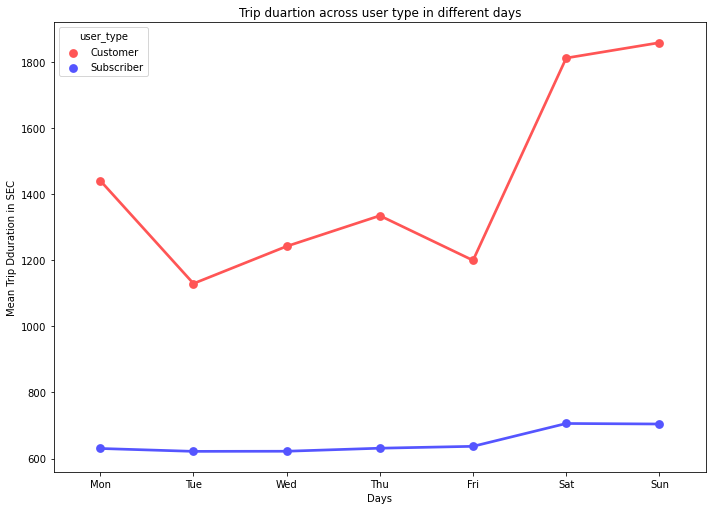

In [7]:
fig = plt.figure(figsize = [ 11.69, 8.27])
sb.pointplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', palette = 'seismic_r', ci=None , order = week_days)

plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration in SEC')
plt.xlabel('Days')
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [9]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 625093 bytes to slide_deck_template.slides.html
